## Initialize important libraries:

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy.io import loadmat 


### Extract data from .mat file and Initialize a dictionary variable which conatains EMG data of different types of movements

In [133]:
#src of database
src = 'M:/sEMG_Basic_Hand_movements_upatras/Database 1/male_1'
# src = 'M:/sEMG_Basic_Hand_movements_upatras/Database 1/male_2'
# src = 'M:/sEMG_Basic_Hand_movements_upatras/Database 1/female_1'
# src = 'M:/sEMG_Basic_Hand_movements_upatras/Database 1/female_2'
# src = 'M:/sEMG_Basic_Hand_movements_upatras/Database 1/female_3'



#function to extract data and convert them to Dataframes 
def extract_data(src):
    movements = loadmat(src)
    unused_keys = ['__globals__','__header__','__version__']
    for key,value in list(movements.iteritems()):

        if key in unused_keys:
             del movements[key]
        else:
             movements[key] = pd.DataFrame(value)

    return movements

movements = extract_data(src)


### Testing data 

In [129]:
print movements['tip_ch1']
# print movements['tip_ch2']
# print movements['cyl_ch2']
# print movements['cyl_ch2']
# print movements['lat_ch1']
# print movements['lat_ch2']
# print movements['spher_ch1']
# print movements['spher_ch2']
# print movements['palm_ch1']
# print movements['palm_ch2']



        0         1         2         3         4         5         6     \
0   0.199706  0.199706  0.199706  0.250710  0.199706  0.301713 -0.004307   
1   0.046696  0.021195  0.123201  0.301713  0.123201  0.072198  0.199706   
2   0.021195  0.072198  0.199706  0.174205  0.276211  0.327214  0.123201   
3  -0.029808  0.123201  0.276211  0.250710  0.250710  0.123201  0.225208   
4   0.225208  0.225208  0.148703  0.046696  0.046696  0.097700 -0.029808   
5   0.174205  0.301713  0.199706  0.225208  0.148703  0.046696  0.123201   
6   0.021195  0.378218  0.225208  0.301713  0.148703  0.199706  0.046696   
7   0.123201 -0.004307  0.123201  0.250710  0.378218  0.123201  0.276211   
8   0.276211  0.250710  0.276211  0.123201  0.174205  0.123201  0.097700   
9   0.072198 -0.029808 -0.055310  0.021195  0.199706  0.276211  0.301713   
10  0.021195 -0.055310  0.046696  0.021195  0.097700  0.378218  0.225208   
11  0.148703  0.123201  0.123201  0.174205  0.199706  0.021195  0.097700   
12  0.276211

### ** Basic Visualization**:
   ###### data: The whole Data of all movements.
   ###### movement_type: the movement which we want to visualize.
   ###### patient_index: the index of patient who we want to visualize his data(our index ranges from 0:29).
##### x_axis: Time  ( sampling rate of the data is 500 Hz).
##### y_axis: EMG signal.+

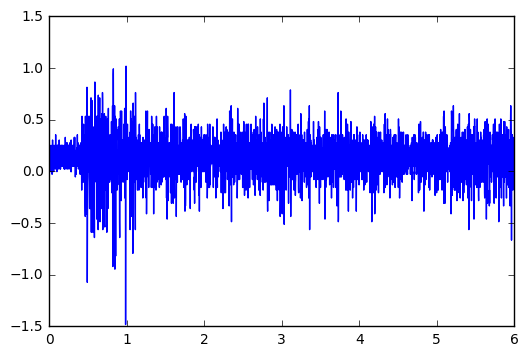

In [151]:
def visualization (data,movement_type, patient_index):
    if  (movement_type not in data.keys()) or patient_index > len(data[movement_type]):
        print("Error. please check the patient index or the movement type!")
    else:
        x_axis=np.linspace(0,6,3000)
        y_axis=pd.DataFrame(data[movement_type]).loc[patient_index,:]
        plt.plot(x_axis,y_axis)
        plt.show()

visualization(movements,"tip_ch2",0)